# Scipy.stats Tutorials - Statistical Hypothesis Tests - Part 1

**CONTENTS**

- [Probability Distribution](#distribution)
- [Normality Tests](#normality)
    + Shapiro-Wilk Test
    + D'Agostino's K^2 Test
    + Anderson_Darling Test
- [Correlation Tests](#correlation)
    + Pearson's Correlation Coefficient
    + Spearman's Rank Correlation
    + Kendall's Rank Correlation
    + Chi-Squared Test
- [Stationary Tests](#stationary)
    + Augmented Dickey-Fuller
    + Kwiatkowski-Phillips-Schmidt-Shin

[Ref](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

<a id='distribution'></a>
## 1. PROBABILITY DISTRIBUTION

- **Bernoulli Distribution** (only two possible outcomes and a single trial)
    + Example: single toss of a coin: p for head and 1-p for tail.
- **Uniform Distribution**
    + Example: roll a fair dice of 6 faces: same probability of 1/6 for each face 
- **Binomial Distribution** (the sum of outcomes of an event following a Bernoulli distribution)
    + Example: toss a coin (p for head and 1-p for tail) n times (n is the number of independent events)
- **Normal Distribution**: most common
    + the average height/weight in populations, students average scores, ...
- **Poisson Distribution**: the probability that an event might happen or not knowing how often it usually occurs.
    + Example: risk analysis (eg. predict the number of car crash accidents within a predefined time span) to decide car insurance pricing.
    + the number of patients an hospital will receive on its Emergency Department in an hour.
- **Exponential Distribution**: “time until event”, maybe “time until failure.”
    + Example: survival analysis (eg. expected life of a device/machine).
    + How long until the next customer calls?
    + the time you need to wait before your bus arrives, knowing that there is a bus every 15 minute. 

[Ref](https://towardsdatascience.com/probability-distributions-in-data-science-cce6e64873a7)

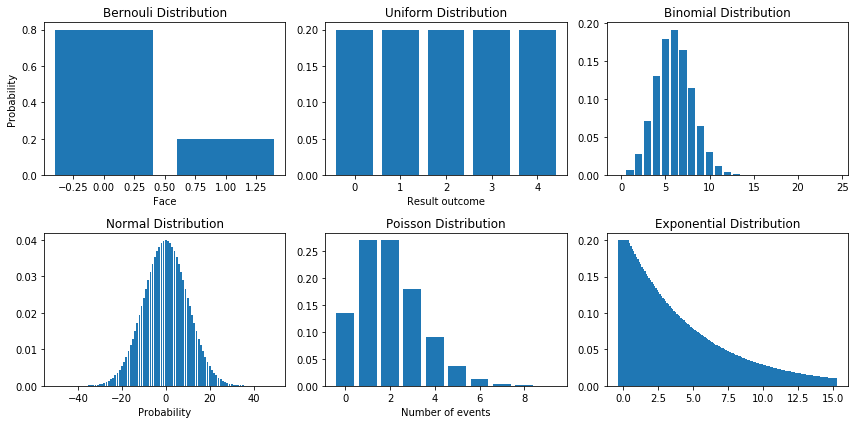

In [299]:
import scipy.stats as stats
plt.figure(figsize = (12, 6))
### Generate examples of the distribution
### Bernoulli Distribution (only two possible outcomes and a single trial)
bernouli = np.array([[0.8, 0.2], [0,1]])
### Draw the distribution
plt.subplot(2,3,1)
plt.bar(bernouli[1], bernouli[0])
plt.xlabel("Face")
plt.ylabel('Probability')
plt.title('Bernouli Distribution')

### Uniform Distribution
n = np.arange(0,5)
uniform = np.full((1,5), 1/5)
# or uniform = np.full((5), 1/5)
# or uniform = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
### Draw the distribution
plt.subplot(2,3,2)
plt.bar(n, uniform[0])
plt.xlabel("Result outcome")
plt.title('Uniform Distribution')

### Binomial distribution
prob = 0.3
x = np.arange(0, 25)
binom = stats.binom.pmf(x, 20, prob)
# The probability mass function for binom is
# binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)
plt.subplot(2,3,3)
plt.bar(x, binom)
plt.title('Binomial Distribution')

### Normal distribution using probability density function pdf
n = np.arange(-50,50)
mean, stdev = 0, 10
normal = stats.norm.pdf(n, mean, stdev)
plt.subplot(2,3,4)
plt.bar(n, normal)
plt.xlabel('Probability')
plt.title('Normal Distribution')

### Poison distribution
# n = number of events, lambd = expected number of events
n = np.arange(0,10)
lambd = 2
poisson = stats.poisson.pmf(n, lambd)
plt.subplot(2,3,5)
plt.bar(n, poisson)
plt.xlabel('Number of events')
plt.title('Poisson Distribution')

### Exponential distribution
x = np.arange(0, 15, 0.1)
y = 0.1 * lambd * np.exp(-0.1*lambd*x)
plt.subplot(2,3,6)
plt.bar(x, y)
plt.title('Exponential Distribution')
plt.tight_layout()
plt.show()

<a id='normality'></a>
## 2. NORMALITY TESTS

- Normality of a dataset could be check by 
    + Graphical methods (plotting data using histogram or Q-Q plot)
    + Statistical Tests

#### GOAL
    - To check if the data has a Gaussian distribution
    - If data has a Gaussian distribution => Use parametric statistical methods
    - If not => Use nonparametric statistical methods.
    
#### ASSUMPTIONS
    - Observations in each sample are independent
    - Observations are identically distributed
    
#### HYPOTHESIS
    - H0: the sample has a Gaussian distribution
    - H1: the sample does not.
    
#### SOME NORMALITY TESTS

- **D'Agostino's K^2 Test**
    + Calculate kurtosis (how much of the distribution is in the tail) and skewness (a measure of asymmetry of the distribution)
    + Need to set the significance level alpha value for intepretation (reject or fail to reject H0): it is very likely true given available evidence.
- **Shapiro-Wilk Test**
    + A reliable test
    + May be suitable for small dataset (less than thousands observations)
    
- **Anderson_Darling Test**
    + Has its own threshold: significance_level 15%, 10%, 5%, 2.5%, 1%
    + Need to set the significance level alpha value for intepretation (reject or fail to reject H0): it is very likely true given available evidence.

#### WHICH TEST SHOULD BE USED

- Use all and check the result:
    + Hard fail: data is not normal distributed.
    + Soft fail: data could be Gaussian-like => Can treat as Gaussian.

### 2.1. GRAPHICAL METHODS

In [59]:
economics = pd.read_csv("data/economics.csv")
print(economics.shape)
economics.head(3)

(574, 6)


,date,pce,pop,psavert,uempmed,unemploy
0,7/1/67,506.7,198712.0,12.6,4.5,2944
1,8/1/67,509.8,198911.0,12.6,4.7,2945
2,9/1/67,515.6,199113.0,11.9,4.6,2958


In [60]:
economics.columns

Index(['date', 'pce', 'pop', 'psavert', 'uempmed', 'unemploy'], dtype='object')

#### 2.1.1. HISTOGRAM OR DISPLOT

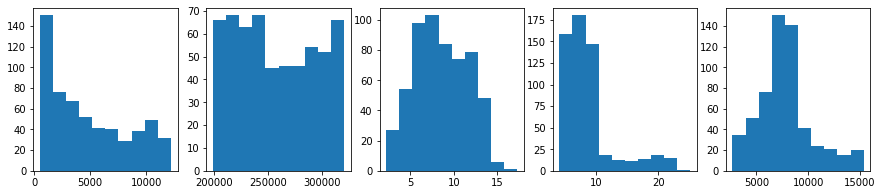

In [48]:
# Histogram from plt
cols = ['pce', 'pop', 'psavert', 'uempmed', 'unemploy']
plt.figure(figsize = (15, 3))
for i in range(len(cols)):
    plt.subplot(1, len(cols), i+1)
    plt.hist(economics[cols[i]])
    
plt.show()

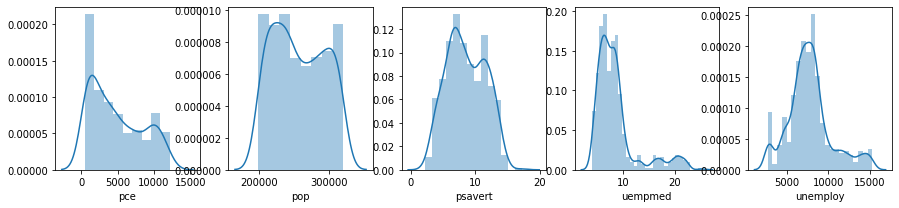

In [17]:
### Distplot from seaborn
cols = ['pce', 'pop', 'psavert', 'uempmed', 'unemploy']
plt.figure(figsize = (15, 3))
for i in range(len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.distplot(economics[cols[i]])
    
plt.show()

(100,)


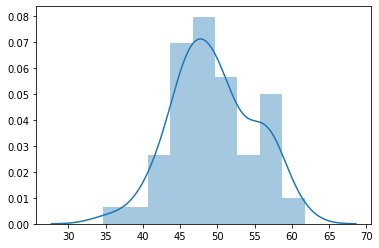

In [45]:
normal_dataset = 5 * np.random.randn(100) + 50
print(normal_dataset.shape)
sns.distplot(normal_dataset)
plt.show()

#### 2.1.2. QUANTILE - QUANTILE PLOT (QQ PLOT)

- QQ plot could be drawn using statsmodels
- A normal distributed dataset will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. 

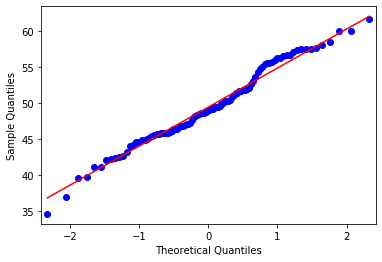

In [51]:
### Plot the normal distributed dataset

#!pip install statsmodels
from statsmodels.graphics.gofplots import qqplot
qqplot(normal_dataset, line = 's')
plt.show()

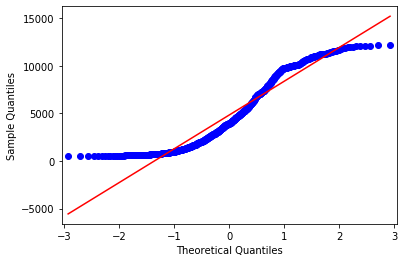

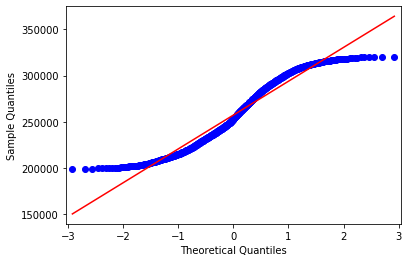

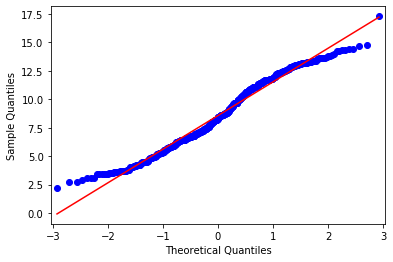

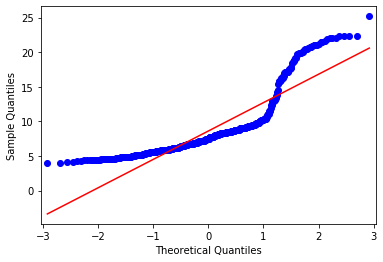

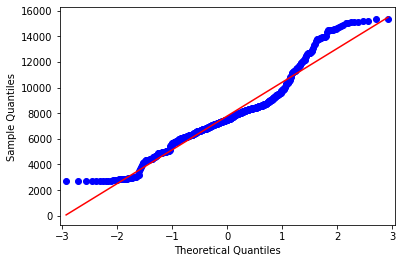

In [58]:
### QQ plot on economics data
cols = ['pce', 'pop', 'psavert', 'uempmed', 'unemploy']
for i in range(len(cols)):
    qqplot(economics[cols[i]], line = 's')
    plt.show()

### 2.2. STATISTICAL NORMALITY TESTS

In [ ]:
from scipy.stats import normaltest # D'Agostino's K^2 Test
from scipy.stats import shapiro # Shapiro-Wilk Test
from scipy.stats import anderson # Anderson_Darling Test

In [66]:
### Run all the 3 tests
# Set the significance level alpha
alpha = 0.05

def normality_tests(data, alpha = 0.05):
    ##############
    print('Shapiro-Wilk Test -----------')

    stat, p = shapiro(data)
    print("stat = %.3f, p = %.3f" % (stat, p))
    if p > alpha:
        print("Probably Gaussian distribution\n")
    else: 
        print("Probably not Gaussian distribution\n")

    ##############
    print ("D'Agostino's K^2 Test -----------")
    stat, p = normaltest(data)
    print("stat = %.3f, p = %.3f" % (stat, p))
    if p > alpha:
        print("Probably Gaussian distribution\n")
    else: 
        print("Probably not Gaussian distribution\n")

    ##############
    print ("Anderson_Darling Test -----------")
    stat, critical_vals, significance_level = anderson(data)
    print("stat = %.3f" % (stat))
    for i in range(len(critical_vals)):
        cv, sl = critical_vals[i], significance_level[i]
        if stat < cv:
            print('Probably Gaussian at %.1f%% level' % (sl))
        else:
            print('Probably not Gaussian at %.1f%% level' % (sl))

In [68]:
normality_tests(economics['psavert'], 0.05)

Shapiro-Wilk Test -----------
stat = 0.975, p = 0.000
Probably not Gaussian distribution

D'Agostino's K^2 Test -----------
stat = 84.823, p = 0.000
Probably not Gaussian distribution

Anderson_Darling Test -----------
stat = 4.298
Probably not Gaussian at 15.0% level
Probably not Gaussian at 10.0% level
Probably not Gaussian at 5.0% level
Probably not Gaussian at 2.5% level
Probably not Gaussian at 1.0% level


In [71]:
normality_tests(normal_dataset, 0.01)

Shapiro-Wilk Test -----------
stat = 0.984, p = 0.250
Probably Gaussian distribution

D'Agostino's K^2 Test -----------
stat = 0.270, p = 0.874
Probably Gaussian distribution

Anderson_Darling Test -----------
stat = 0.664
Probably not Gaussian at 15.0% level
Probably not Gaussian at 10.0% level
Probably Gaussian at 5.0% level
Probably Gaussian at 2.5% level
Probably Gaussian at 1.0% level


<a id='correlation'></a>
## 3. CORRELATION TESTS

#### CORRELATION:
- Reasons of correlation:
    + One variable could be lightly associated with another variable.
    + One variable could cause or depend on the values of another variable.
    + Two variables could depend on a third unknown variable.

#### GOAL
- Check if two samples are related
- Possible cases:
    + Positive Correlation: both variables change in the same direction.
    + Neutral Correlation: No relationship in the change of the variables.
    + Negative Correlation: variables change in opposite directions.
- Could be check by:
    + Covariance
    + Correlation statistical tests
    
#### ASSUMPTIONS
- Observations in each sample are:
    + independent
    + identically distributed
    
#### HYPOTHESIS
    - H0: the two samples are independent
    - H1: there is a dependency between the samples
    
#### SOME CORRELATION TESTS & WHEN TO USE

- **Pearson's Correlation Coefficient**
    + Check whether 2 samples have a linear relationship
    + Use for Gausian or Gausian-like distributed data

- **Spearman's Rank Correlation or Kendall's Rank Correlation**
    + Check whether 2 samples have a monotonic relationship
    + May have non-Gaussian distribution => It is good to used if you are unsure of the distribution and possible relationships between two variables
    
- **Chi-Squared Test**
    + Check whether 2 categorical variables are related or independent

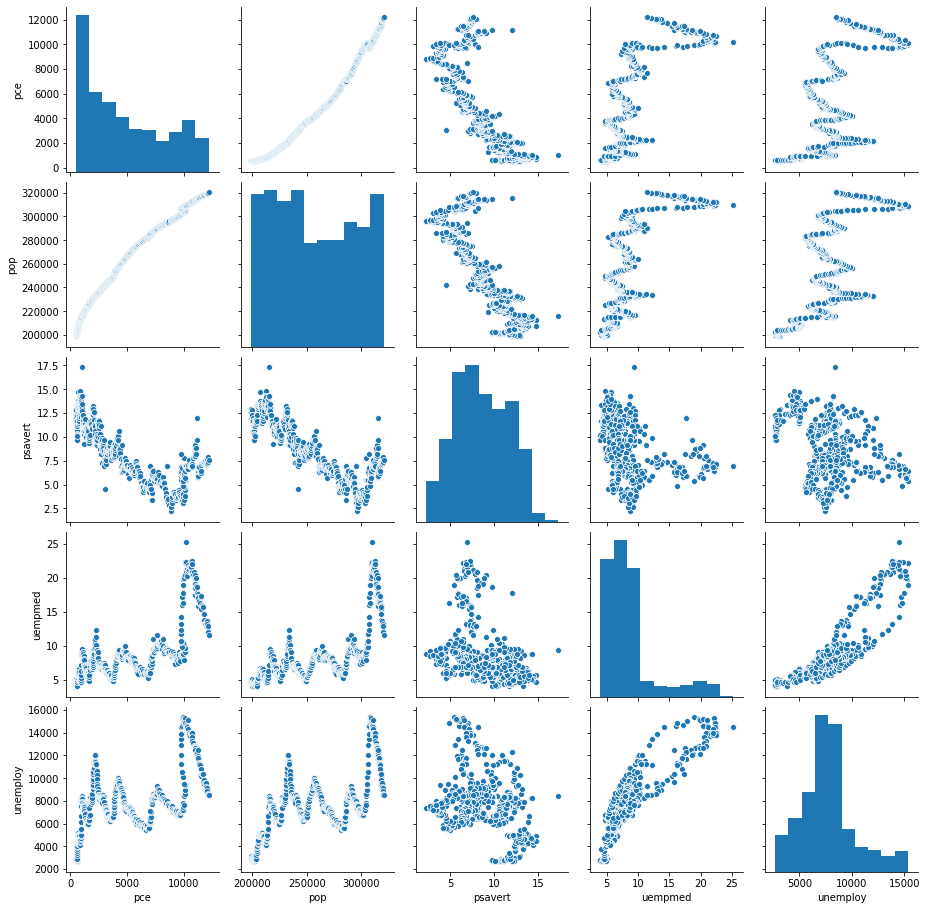

In [72]:
### Visualization of all the features
sns.pairplot(economics[['pce', 'pop', 'psavert', 'uempmed', 'unemploy']])

(100,) (100,)


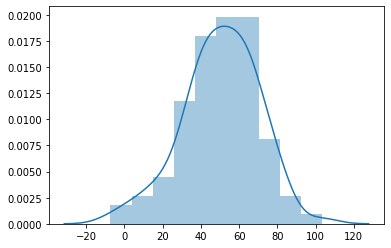

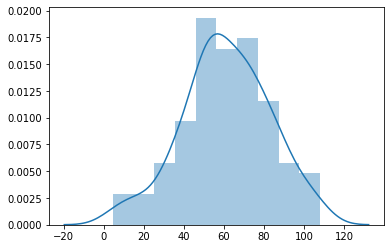

In [82]:
#### Create 2 normal datasets as example for this correlation tests
normal_dataset1 = 20 * np.random.randn(100) + 50
normal_dataset2 = normal_dataset1 + (10 * np.random.randn(100) + 10)
print(normal_dataset1.shape, normal_dataset2.shape)
sns.distplot(normal_dataset1)
plt.show()
sns.distplot(normal_dataset2)
plt.show()

In [84]:
### Test normality
print("Dataset 1:")
normality_tests(normal_dataset1, 0.05)
print("\nDataset 2:")
normality_tests(normal_dataset2, 0.05)

Dataset 1:
Shapiro-Wilk Test -----------
stat = 0.986, p = 0.357
Probably Gaussian distribution

D'Agostino's K^2 Test -----------
stat = 3.443, p = 0.179
Probably Gaussian distribution

Anderson_Darling Test -----------
stat = 0.393
Probably Gaussian at 15.0% level
Probably Gaussian at 10.0% level
Probably Gaussian at 5.0% level
Probably Gaussian at 2.5% level
Probably Gaussian at 1.0% level

Dataset 2:
Shapiro-Wilk Test -----------
stat = 0.991, p = 0.718
Probably Gaussian distribution

D'Agostino's K^2 Test -----------
stat = 0.671, p = 0.715
Probably Gaussian distribution

Anderson_Darling Test -----------
stat = 0.205
Probably Gaussian at 15.0% level
Probably Gaussian at 10.0% level
Probably Gaussian at 5.0% level
Probably Gaussian at 2.5% level
Probably Gaussian at 1.0% level


### 3.1. COVARIANCE

##### ASSUMPTIONS:
- Samples have a Gaussian or Gaussian-like distribution.
- Covariance is the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted):
            cov(X1, X2) = (sum(x1 - mean(X1)) * sum(x2 - mean(X2))) * 1/(n-1)
- Drawbacks:
    + The magnitude of the covariance is not easily interpreted. 
    + A covariance value of zero indicates that both variables are completely independent.

In [85]:
np.cov(normal_dataset1, normal_dataset2)

array([[395.72715868, 393.53132366],
       [393.53132366, 475.49617387]])

### 3.2. STATISTICAL CORRELATION TESTS FOR NUMERIC VARIABLES

#### 3.2.1. Pearson's Correlation Coefficient

##### ASSUMPTIONS:
    - Beside the assumptions above (observation are independent and identically distributed), other assumptions include:
    + normally distributed (Gaussian or Gaussian-like distribution).
    + has the same variance

    Pearson's Correlation Coefficient of (X1, X2) = covariance(X1, X2)/ (stdv(X1) * stdv(X2))

In [95]:
### Calculate Pearson's Correlation Coefficient using numpy
np.cov(normal_dataset1, normal_dataset2)[0][0]/(np.std(normal_dataset1) * np.std(normal_dataset2)) 

0.9214870164283725

In [86]:
### scipy.stats pearsonr
# Set the significance level alpha
alpha = 0.05
from scipy.stats import pearsonr

stat, p = pearsonr(normal_dataset1, normal_dataset2)
print('stat = %.3f, p = %.3f' % (stat, p))
if p > alpha:
    print("Probably independent (Fail to reject the H0 hypothesis)")
else:
    print("Probably dependent (Reject the H0 hypothesis)")

stat = 0.907, p = 0.000
Probably dependent (Reject the H0 hypothesis)


#### 3.2.2. Spearman's Correlation Coefficient

##### ASSUMPTIONS:

- Beside the assumptions above (observation are independent and identically distributed), other assumptions include:
    + Observations in each sample can be ranked.
                
- Calculate using the rank values instead of the real values.
        
        Spearman's Correlation Coefficient of (X1, X2) = covariance(rank(X1), rank(X2))/ (stdv(rank(X1)) * stdv(rank(X2)))


In [97]:
### scipy.stats pearsonr
# Set the significance level alpha
alpha = 0.05
from scipy.stats import spearmanr

stat, p = spearmanr(normal_dataset1, normal_dataset2)
print('stat = %.3f, p = %.3f' % (stat, p))
if p > alpha:
    print("Probably independent (Fail to reject the H0 hypothesis)")
else:
    print("Probably dependent (Reject the H0 hypothesis)")

stat = 0.894, p = 0.000
Probably dependent (Reject the H0 hypothesis)


In [98]:
stat, p = spearmanr(economics['pce'],economics['pop'])
print('stat = %.3f, p = %.3f' % (stat, p))
if p > alpha:
    print("Probably independent (Fail to reject the H0 hypothesis)")
else:
    print("Probably dependent (Reject the H0 hypothesis)")

stat = 1.000, p = 0.000
Probably dependent (Reject the H0 hypothesis)


In [101]:
stat, p = spearmanr(economics['pop'],economics['uempmed'])
print('stat = %.3f, p = %.3f' % (stat, p))
if p > alpha:
    print("Probably independent (Fail to reject the H0 hypothesis)")
else:
    print("Probably dependent (Reject the H0 hypothesis)")

stat = 0.728, p = 0.000
Probably dependent (Reject the H0 hypothesis)


#### 3.2.3. Kendall's Rank Correlation

##### ASSUMPTIONS:

- Beside the assumptions above (observation are independent and identically distributed), other assumptions include:
    + Observations in each sample can be ranked.


In [102]:
### scipy.stats kendalltau
# Set the significance level alpha
alpha = 0.05
from scipy.stats import c

stat, p = kendalltau(normal_dataset1, normal_dataset2)
print('stat = %.3f, p = %.3f' % (stat, p))
if p > alpha:
    print("Probably independent (Fail to reject the H0 hypothesis)")
else:
    print("Probably dependent (Reject the H0 hypothesis)")

stat = 0.718, p = 0.000
Probably dependent (Reject the H0 hypothesis)


In [103]:
stat, p = kendalltau(economics['unemploy'], economics['uempmed'])
print('stat = %.3f, p = %.3f' % (stat, p))
if p > alpha:
    print("Probably independent (Fail to reject the H0 hypothesis)")
else:
    print("Probably dependent (Reject the H0 hypothesis)")

stat = 0.669, p = 0.000
Probably dependent (Reject the H0 hypothesis)


### 3.3. STATISTICAL CORRELATION TESTS FOR CATEGORICAL VARIABLES

#### 3.3.1. Contingency Table

- A table summarization of the categorical variables
- For example:

|  | Survived | Dead |
| --- | --- | --- |
| Male | 15 | 38 |
| Female | 80 | 14 |

- "Contingency": to help determine whether one variable is contingent upon or depends upon the other variable. 
- For the test to be effective, at least five observations are required in each cell of the contingency table.

#### 3.3.2. Chi2_contingency() function

- The function take the contingency table and return:
    + Calculated statistic `stat`
    + p-value `p`
    + Calculated degrees of freedom `dof` (dof = (rows - 1) * (cols - 1))
    + Table of expected frequencies `expected`
    

- There are 2 ways to interpret the result:
    + **Using p-value**
    + **Using test-statistic**

In [213]:
titanic = pd.read_csv('data/titanic.csv')
print(titanic.shape)
titanic.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [206]:
### Create the contingency table for chi-squared test
titanic_table = pd.crosstab(titanic['Sex'], titanic['Survived'], rownames = ['Sex'], colnames = [''])
titanic_table.rename(columns = {0:'Dead', 1: 'Survived'}, inplace = True)
titanic_table

,Dead,Survived
Sex,,
female,81,233
male,468,109


In [212]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(titanic_table)
print('stat = %.3f, p = %.3f' % (stat, p))

### INTERPRET THE RESULT
### Using p-value
print("Interpret the result using p-value: %.3f"% p)
# Set the significance level alpha
alpha = 0.05
if p > alpha:
    print('=> Probably independent (Failed to reject H0)')
else:
    print('=> Probably dependent (Reject H0)')

### Using test-statistic
from scipy.stats import chi2
prob = 0.95
critical = chi2.ppf(prob, dof)
print("Interpret the result using test-statistic - stat = %.3f, critical = %.3f" % (stat, critical))
if abs(stat) > critical:
    print('=> Probably dependent (Reject H0)')
else:
    print('=> Probably independent (Failed to reject H0)')

stat = 260.717, p = 0.000
Interpret the result using p-value: 0.000
=> Probably dependent (Reject H0)
Interpret the result using test-statistic - stat = 260.717, critical = 3.841
=> Probably dependent (Reject H0)


<a id='stationary'></a>
## 4. STATIONARY TESTS   

[Ref 1](https://machinelearningmastery.com/time-series-data-stationary-python/)

[Ref 2](https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html)

#### GOAL
- Time series are stationary if do not have trend or seasonal effects. The observations are not dependent on time. 
- Summary statistics (mean or the variance) are consistent over time.
- Some statistical modeling methods assume or require the time series to be stationary.

#### GOAL
    - Check if a time series is stationary or not
    
#### ASSUMPTIONS
    - Observations are temporally ordered
    
#### HYPOTHESIS
    - H0: The time series is non-stationary
    - H1: The time series is stationary
    
#### STATIONARY TESTS

- Visualization
- Summary Statistics (not easy to interpret)
- Statistical Tests
    + Augmented Dickey-Fuller:
        + unit root test
        + H0: the dataset has a unit root => non-stationary
        + H1: does not have a unit root => stationary
    + Kwiatkowski-Phillips-Schmidt-Shin

### 4.1. LOADING EXAMPLE DATASETS

In [221]:
daily_birth = pd.read_csv("data/daily-total-female-births.csv")
print(daily_birth.shape)
daily_birth.head(3)

(365, 2)


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30


In [222]:
air_passengers = pd.read_csv("data/airline-passengers.csv")
print(air_passengers.shape)
air_passengers.head(3)

(144, 2)


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


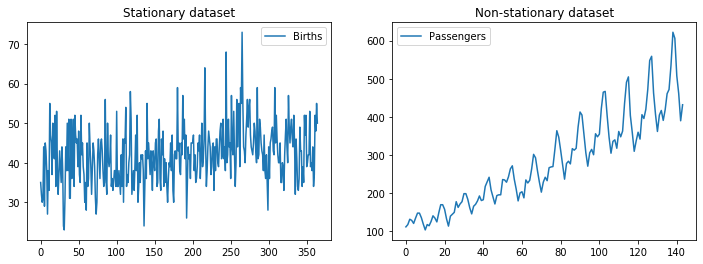

In [241]:
fig, axes = plt.subplots(nrows = 1,ncols = 2, figsize = (12,4))
daily_birth.plot(ax = axes[0], title = "Stationary dataset")
air_passengers.plot(ax = axes[1], title = "Non-stationary dataset")
plt.show()

### 4.2. STATIONARY TESTS

#### 4.2.1. Augmented Dickey-Fuller Stationary Test

In [251]:
from statsmodels.tsa.stattools import adfuller

def stationaryTest(data):
    print("Augmented Dickey-Fuller Stationary Test:")
    stat, p, lags, obs, critical, t = adfuller(data)
    print('stat = %.3f, p = %.3f' % (stat, p))
    if p > 0.05:
        print('Probably not Stationary')
    else:
        print('Probably Stationary')

In [253]:
stationaryTest(daily_birth.Births)
stationaryTest(air_passengers.Passengers)

Augmented Dickey-Fuller Stationary Test:
stat=-4.808, p=0.000
Probably Stationary
Augmented Dickey-Fuller Stationary Test:
stat=0.815, p=0.992
Probably not Stationary


#### 4.2.2. Kwiatkowski-Phillips-Schmidt-Shin Stationary Test

In [259]:
# Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
# Set the significance level alpha
alpha = 0.05
def trendStationaryTest(data):
    print("Kwiatkowski-Phillips-Schmidt-Shin Trend Stationary Test:")
    stat, p, lags, critical = kpss(data)
    print('stat = %.3f, p = %.3f' % (stat, p))
    if p > alpha:
        print('Probably not Stationary')
    else:
        print('Probably Stationary')

In [260]:
trendStationaryTest(daily_birth.Births)
trendStationaryTest(air_passengers.Passengers)

Kwiatkowski-Phillips-Schmidt-Shin Trend Stationary Test:
stat = 1.117, p = 0.010
Probably Stationary
Kwiatkowski-Phillips-Schmidt-Shin Trend Stationary Test:
stat = 1.052, p = 0.010
Probably Stationary


/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
